# Using Panda Library for reading data from file and working with data 
* Install Pandas in the working environment by 'conda install pandas'
* Pandas can read CSV files directly with headers and can handle data with header. 
* Can do operations on column and can be used to plot, correlate different columns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading from datafiles and storing the entire data to a Panda DataFrame (df)
df=pd.read_csv('58K11_Cu_SyntheticData.csv')
df

,Station_id,Longitude,Latitude,Cu_ppm
0,0,78.5000,17.2500,138.72
1,1,78.5000,17.2591,77.14
2,2,78.5000,17.2682,388.60
3,3,78.5000,17.2773,NaN
4,4,78.5000,17.2864,130.09
...,...,...,...,...
779,779,78.7455,17.4591,105.63
780,780,78.7455,17.4682,191.92
781,781,78.7455,17.4773,157.64
782,782,78.7455,17.4864,NaN


In [3]:
# Show first five data(Head)
df.head()

,Station_id,Longitude,Latitude,Cu_ppm
0,0,78.5,17.2500,138.72
1,1,78.5,17.2591,77.14
2,2,78.5,17.2682,388.60
3,3,78.5,17.2773,NaN
4,4,78.5,17.2864,130.09


In [4]:
# Show last 5 data(Tail)
df.tail()

,Station_id,Longitude,Latitude,Cu_ppm
779,779,78.7455,17.4591,105.63
780,780,78.7455,17.4682,191.92
781,781,78.7455,17.4773,157.64
782,782,78.7455,17.4864,NaN
783,783,78.7455,17.4955,121.62


# Data Cleaning in Pandas
* Often some data remains missing/NaN(Not a Number). 
* Such data we prefer to delete from the dataframe, as part of data cleaning
* The cleaned data is stored in a new dataframe(sometimes we overwrite the ol dataframe) and used

In [5]:
new_df=df.dropna(ignore_index=True)  # The Panda indices are reassigned but the sample locations are still identified by Station_id
new_df

,Station_id,Longitude,Latitude,Cu_ppm
0,0,78.5000,17.2500,138.72
1,1,78.5000,17.2591,77.14
2,2,78.5000,17.2682,388.60
3,4,78.5000,17.2864,130.09
4,5,78.5000,17.2955,134.94
...,...,...,...,...
766,778,78.7455,17.4500,165.50
767,779,78.7455,17.4591,105.63
768,780,78.7455,17.4682,191.92
769,781,78.7455,17.4773,157.64


In [6]:
# Get all Column names( Particularly useful for large datasets)
new_df.columns

Index(['Station_id', 'Longitude', 'Latitude', 'Cu_ppm'], dtype='object')

In [7]:
# Accessing a particular column by name
print(new_df['Cu_ppm'])

0      138.72
1       77.14
2      388.60
3      130.09
4      134.94
        ...  
766    165.50
767    105.63
768    191.92
769    157.64
770    121.62
Name: Cu_ppm, Length: 771, dtype: float64


In [8]:
# Accessing a column by location
print(new_df.iloc[:,3])   # : implies all rows, 3 implies 3-rd column. 

0      138.72
1       77.14
2      388.60
3      130.09
4      134.94
        ...  
766    165.50
767    105.63
768    191.92
769    157.64
770    121.62
Name: Cu_ppm, Length: 771, dtype: float64


In [9]:
# Accessing a particular row
new_df.iloc[249,:]

Station_id    253.0000
Longitude      78.5818
Latitude       17.2591
Cu_ppm        130.7000
Name: 249, dtype: float64

In [10]:
# Accessing a single element at a given row of a particular column
new_df['Cu_ppm'][249]

130.7

In [11]:
# Basic Numpy operations also work on Panda dataframe
print('Copper in PPM: Minimum, Maximum, Average, Standard_dev =', np.min(new_df.Cu_ppm), np.max(new_df.Cu_ppm), np.mean(new_df.Cu_ppm), np.std(new_df.Cu_ppm))

Copper in PPM: Minimum, Maximum, Average, Standard_dev = 1.11 426.09 123.27101167315175 73.06835331417602


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


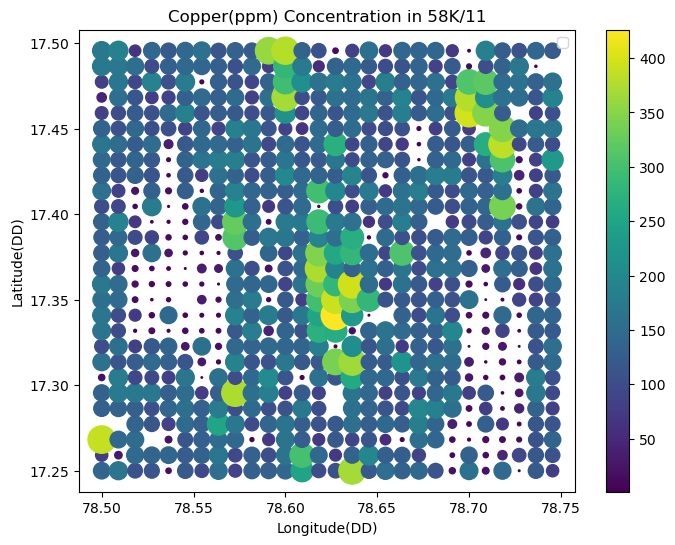

In [12]:
# Visualize Copper concentration on map
plt.figure(figsize=(8,6))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10) 
plt.scatter(new_df.Longitude, new_df.Latitude, c=new_df.Cu_ppm, s=new_df.Cu_ppm)
plt.colorbar()
plt.legend()
plt.title('Copper(ppm) Concentration in 58K/11')
plt.xlabel('Longitude(DD)')
plt.ylabel('Latitude(DD)')
plt.savefig('58K11_Cu.jpg', dpi=200, bbox_inches='tight')

(array([30., 29., 16., 20.,  6.,  6.,  8.,  0.,  6.,  1.,  5.,  0.,  0.,
         3.,  1.,  4.,  9., 12., 13., 18., 13., 14., 16., 20., 20., 27.,
        26., 24., 26., 27., 35., 32., 33., 32., 29., 17., 27., 21., 17.,
        18., 14., 15.,  7.,  7.,  5.,  4.,  3.,  1.,  0.,  3.,  1.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,  3.,  2.,  0.,
         1.,  3.,  0.,  1.,  3.,  1.,  2.,  2.,  0.,  1.,  0.,  1.,  1.,
         0.,  2.,  1.,  3.,  0.,  0.,  1.,  1.,  2.,  2.,  2.,  0.,  1.,
         1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.11  ,   5.3598,   9.6096,  13.8594,  18.1092,  22.359 ,
         26.6088,  30.8586,  35.1084,  39.3582,  43.608 ,  47.8578,
         52.1076,  56.3574,  60.6072,  64.857 ,  69.1068,  73.3566,
         77.6064,  81.8562,  86.106 ,  90.3558,  94.6056,  98.8554,
        103.1052, 107.355 , 111.6048, 115.8546, 120.1044, 124.3542,
        128.604 , 132.8538, 137.1036, 141.3534, 145.6032, 149.853 ,
        154.1028, 158.3526

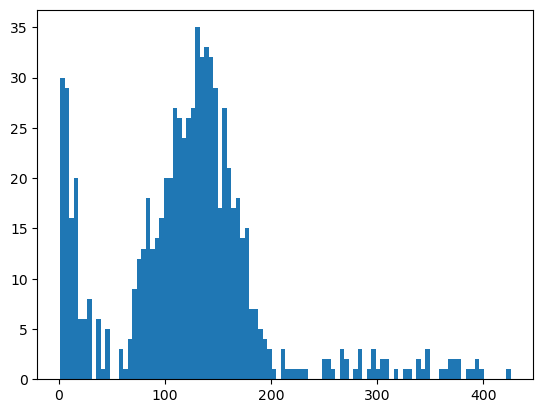

In [13]:
# Histogram plot from Matplotlib. 

plt.hist(new_df.Cu_ppm, bins=100)

# Extracting information of interest
* We want to see on map only those locations where Cu anomaly shows high anomaly(say >200 ppm)

In [14]:
# Create a new column in the same dataframe, with a different header but all values copied 
new_df['Cu_anomaly'] = new_df['Cu_ppm']
new_df

C:\Users\itsupport\AppData\Local\Temp\ipykernel_3576\2333119099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cu_anomaly'] = new_df['Cu_ppm']


,Station_id,Longitude,Latitude,Cu_ppm,Cu_anomaly
0,0,78.5000,17.2500,138.72,138.72
1,1,78.5000,17.2591,77.14,77.14
2,2,78.5000,17.2682,388.60,388.60
3,4,78.5000,17.2864,130.09,130.09
4,5,78.5000,17.2955,134.94,134.94
...,...,...,...,...,...
766,778,78.7455,17.4500,165.50,165.50
767,779,78.7455,17.4591,105.63,105.63
768,780,78.7455,17.4682,191.92,191.92
769,781,78.7455,17.4773,157.64,157.64


In [15]:
# Get the index values(rows) where Cu anomaly values are higher than threshold
print(np.where(new_df['Cu_ppm']>200))

(array([  2, 195, 225, 235, 236, 237, 281, 302, 322, 326, 327, 328, 329,
       330, 331, 332, 356, 368, 369, 370, 371, 372, 373, 375, 377, 392,
       394, 395, 396, 397, 399, 406, 413, 419, 420, 421, 423, 424, 425,
       427, 428, 452, 503, 510, 629, 630, 631, 655, 656, 657, 658, 678,
       681, 682, 683, 764], dtype=int64),)


In [16]:
# We want the above values to be visualized on map but all values to be muted(i.e. replace by NaN)
# Get all rows where Cu<=200
row_le200=np.where(new_df['Cu_ppm']<=200)
row_le200

(array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [17]:
# Replace all values for the above rows(and of the 4-th column) to NaN
new_df['Cu_anomaly'][row_le200] = np.nan
new_df

C:\Users\itsupport\AppData\Local\Temp\ipykernel_3576\645649847.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['Cu_anomaly'][row_le200] = np.nan
C:\Users\itsupport\AppData\Local\Temp\ipykernel_3576\645649847.py:2: SettingWithCopyW

,Station_id,Longitude,Latitude,Cu_ppm,Cu_anomaly
0,0,78.5000,17.2500,138.72,NaN
1,1,78.5000,17.2591,77.14,NaN
2,2,78.5000,17.2682,388.60,388.6
3,4,78.5000,17.2864,130.09,NaN
4,5,78.5000,17.2955,134.94,NaN
...,...,...,...,...,...
766,778,78.7455,17.4500,165.50,NaN
767,779,78.7455,17.4591,105.63,NaN
768,780,78.7455,17.4682,191.92,NaN
769,781,78.7455,17.4773,157.64,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


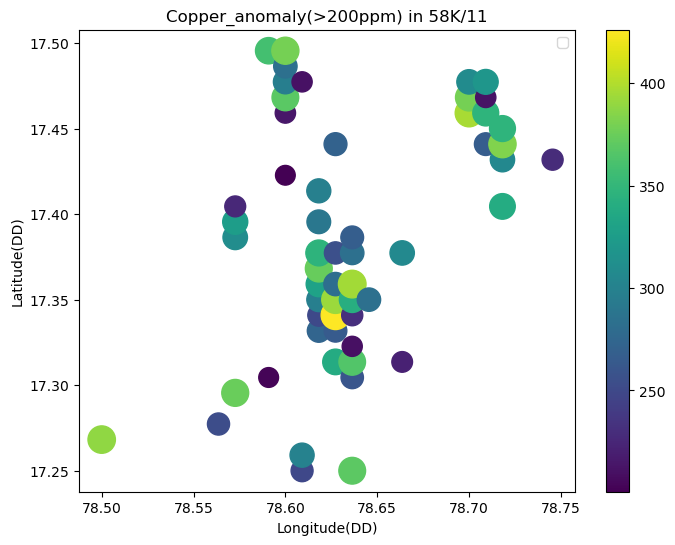

In [18]:
# Visualize Copper Anomaly on map
plt.figure(figsize=(8,6))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10) 
plt.scatter(new_df.Longitude, new_df.Latitude, c=new_df.Cu_anomaly, s=new_df.Cu_anomaly)
plt.colorbar()
plt.legend()
plt.title('Copper_anomaly(>200ppm) in 58K/11')
plt.xlabel('Longitude(DD)')
plt.ylabel('Latitude(DD)')
plt.savefig('58K11_CuAnomaly.jpg', dpi=200, bbox_inches='tight')